<a href="https://www.kaggle.com/code/sourabhgumtaj/zomato?scriptVersionId=103755705" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
zomato=pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
zomato.tail(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


1. Lets make a copy of original data set.
2. Check the info of dataset.
3. Check the null values.

In [3]:
df=zomato.copy()
df.drop_duplicates(keep='first',inplace=True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

4. Delet the unwanted columns.

In [4]:

df.drop(['url','address','phone','menu_item','location','reviews_list'], axis=1, inplace=True)

5. Rename the columns

In [5]:
df.rename(columns={'approx_cost(for two people)': 'cost', 'listed_in(type)': 'type','listed_in(city)':'location'}, inplace=True)

6. Create a new column 'rateNEW' where we will store new 'rate' by spliting the original 'rate'
7. Replace the NaN vvalues in 'rate' column with '0'...........          (df['rate'] = df['rate'].replace(np.nan, 0))
8. Drop the 'rate' column

In [6]:
df['rateNEW']=df['rate'].str.split('/', expand=True)[0]
df['rateNEW'] = df['rateNEW'].replace(np.nan, 0)
df.drop(['rate'], axis=1, inplace=True)


9. Check the unique values in 'rateNEW' and replace them manually.

In [7]:
df['rateNEW'] = df['rateNEW'].replace(['NEW','-']).astype(float, errors = 'raise')

In [8]:
fill= df.fillna('N/A')
df.isnull().sum()

name                0
online_order        0
book_table          0
votes               0
rest_type         227
dish_liked      28078
cuisines           45
cost              346
type                0
location            0
rateNEW             0
dtype: int64

In [9]:
df

,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,location,rateNEW
0,Jalsa,Yes,Yes,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari,4.1
1,Spice Elephant,Yes,No,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari,4.1
2,San Churro Cafe,Yes,No,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,No,No,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari,3.7
4,Grand Village,No,No,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari,3.8
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,27,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield,3.6
51713,Vinod Bar And Restaurant,No,No,0,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield,0.0
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,0,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield,0.0
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield,4.3


In [10]:
df['cost'] = df['cost'].str.replace(',','').astype(float)

In [11]:
s=df['rest_type']=='Casual Dining'

<AxesSubplot:>

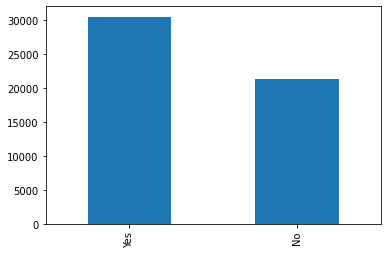

In [12]:
df.online_order.value_counts().plot(kind='bar')

Observation: Many resto has 'online order' available

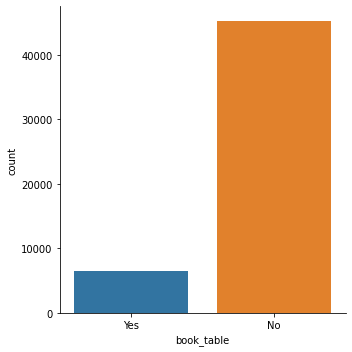

In [13]:
#df.book_table.value_counts().plot(kind='bar')
sns.catplot('book_table',kind = 'count',data = df,aspect =1)

Observation: As its a online food delivery app, many resto dont have 'table booking'.

In [14]:
table=df['book_table']=='Yes'
online=df['online_order']=='Yes'
both=df[table&online]['book_table'].count()
notboth=df[~(table&online)]['book_table'].count()
#df[online]


<AxesSubplot:>

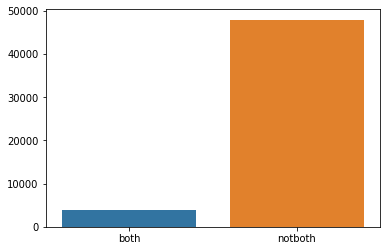

In [15]:
sns.barplot(['both','notboth'],np.array((both,notboth)))

Observation: Above graph shows that very less resto have both 'table boooking & online booking'. So there are high chances that most resto has cloud kitchen.

In [16]:
both

3805

Observation: Out of total resto, these resto has 'Both Observation: Out of total resto, these resto has 'Both Table booking & Online Order'

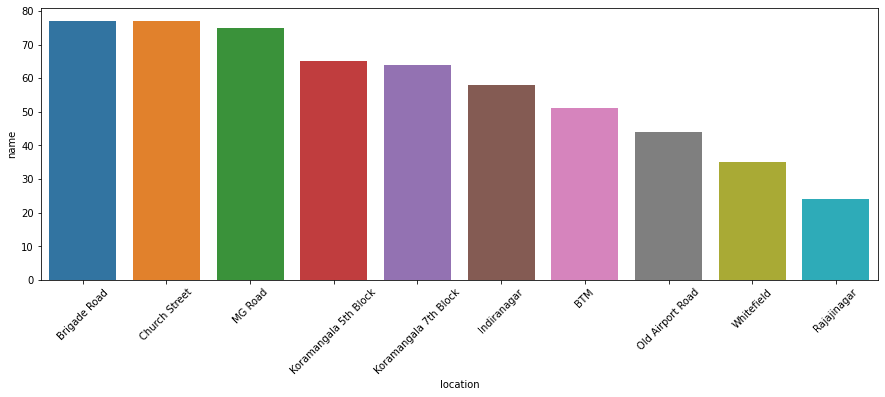

In [17]:
pb=df['type']=='Pubs and bars'
pubNbar=df[pb]
d=pubNbar.groupby('location')['name'].nunique().nlargest(10)
plt.figure(figsize=(15,5))
sns.barplot(d.index,d)
plt.xticks(rotation = 45)
plt.show()


Observation: Above graph shows that 'Bridge Road and Church Street' has maximum pubs. 

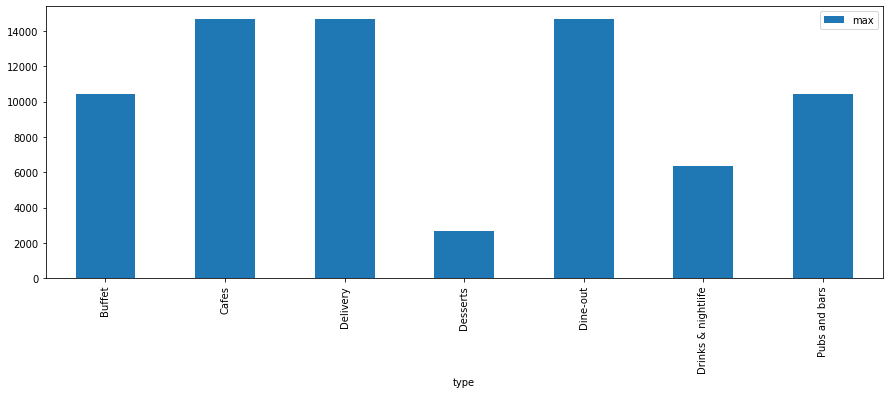

In [18]:
btm=df.groupby(['location','type'])['votes'].agg(['max']).loc['BTM'].plot(kind='bar',figsize=(15,5))


Observation: Above graph shows the maximum votes for different types in 'BTM' area. We can say that people in BTM likes 'cafes, Delivery and Dine-out'.

In [19]:
dd=df.groupby(['location','type'])['votes'].agg(['max']).loc['BTM'] 
dd

,max
type,
Buffet,10413
Cafes,14654
Delivery,14654
Desserts,2668
Dine-out,14654
Drinks & nightlife,6348
Pubs and bars,10422


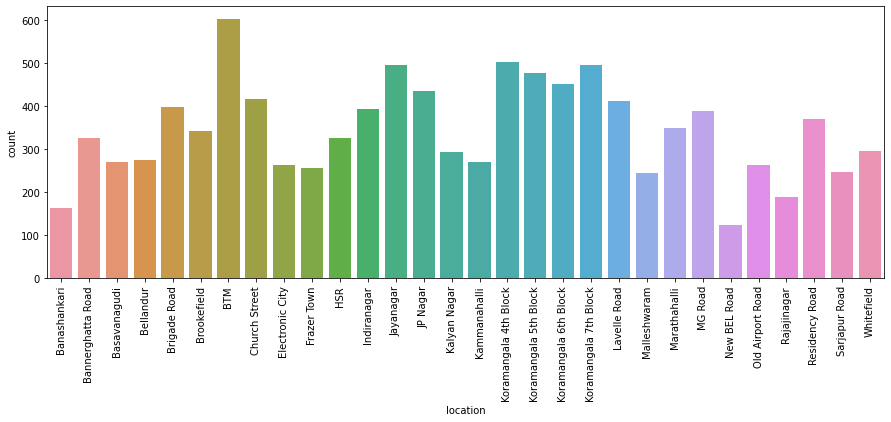

In [20]:
CasDine=df[df['rest_type']=='Casual Dining']
x=CasDine.groupby('location')['name'].nunique().nlargest(20)
x
plt.figure(figsize=(15,5))
sns.countplot(x="location", data=CasDine)
plt.xticks(rotation = 90)
plt.show()

Observation: Above graph shows that 'BTM' has most 'Casual Dining'.

<AxesSubplot:xlabel='location'>

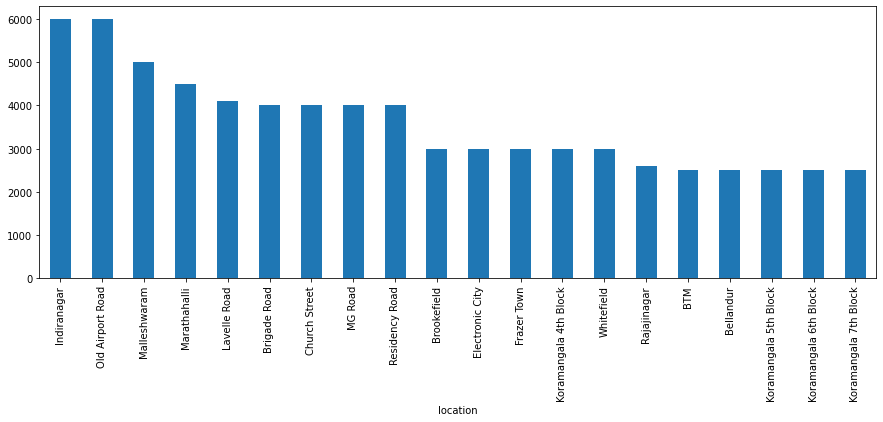

In [21]:
df.groupby('location')['cost'].max().nlargest(20).plot(kind='bar',figsize=(15,5))


Observation: 'Indiranagar' & 'Old airport road' has most expensive resto.

In [22]:

df.sort_values(by='cost',ascending=False)


,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,location,rateNEW
45618,Le Cirque Signature - The Leela Palace,No,Yes,128,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000.0,Dine-out,Old Airport Road,4.3
19139,Le Cirque Signature - The Leela Palace,No,Yes,126,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000.0,Dine-out,Indiranagar,4.3
40266,Royal Afghan - ITC Windsor,No,Yes,413,Fine Dining,"Dal Bukhara, Chocolate Cake, Butter Chicken, N...","North Indian, Mughlai",5000.0,Dine-out,Malleshwaram,4.3
41591,Malties - Radisson Blu,No,No,53,Lounge,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...","Continental, Fast Food",4500.0,Dine-out,Marathahalli,4.3
42141,Malties - Radisson Blu,No,No,53,Lounge,"Cocktails, Jumbo Prawns, Charcuterie Platter, ...","Continental, Fast Food",4500.0,Drinks & nightlife,Marathahalli,4.3
...,...,...,...,...,...,...,...,...,...,...,...
50940,Cinnabon,No,No,80,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,Desserts,Whitefield,4.0
51233,Mayas kitchen,No,No,0,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,Dine-out,Whitefield,0.0
51247,Mast Kalandar,No,No,76,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,Dine-out,Whitefield,2.6
51271,Karavalli Food Court,No,No,4,Casual Dining,NaN,South Indian,NaN,Dine-out,Whitefield,3.2


Observation: 'Le Cirque Signature - The Leela Palace' is the most expensive resto. in Benglore.

In [23]:
df.sort_values(by='rateNEW',ascending=False).head()

,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,location,rateNEW
36684,Asia Kitchen By Mainland China,Yes,Yes,2254,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Dine-out,Koramangala 7th Block,4.9
47987,Belgian Waffle Factory,Yes,No,1749,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Desserts,Residency Road,4.9
33932,Asia Kitchen By Mainland China,Yes,Yes,2249,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Dine-out,Koramangala 6th Block,4.9
3921,Byg Brewski Brewing Company,Yes,Yes,16345,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Delivery,Bellandur,4.9
32436,Asia Kitchen By Mainland China,Yes,Yes,2244,"Casual Dining, Bar","Noodles, Chicken Dim Sum, Pad Thai Noodle, Jum...","Asian, Chinese, Thai, Momos",1500.0,Delivery,Koramangala 6th Block,4.9


Observation: Above graph gives the top ratings for the resto. in Benglore.

<AxesSubplot:xlabel='location'>

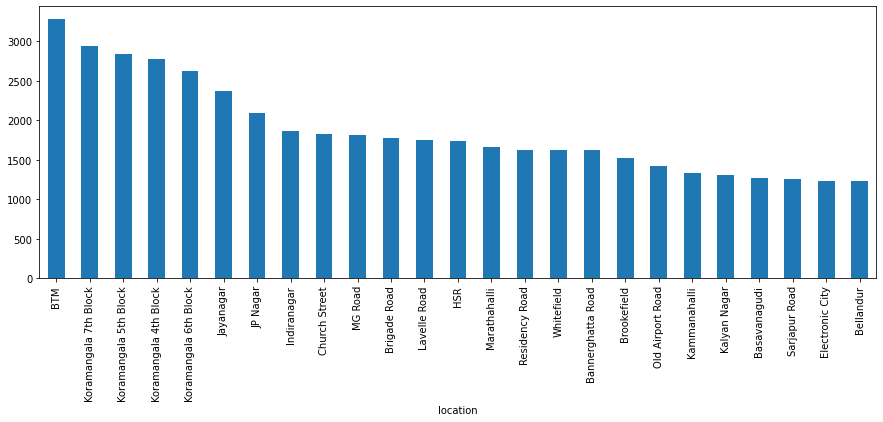

In [24]:
df.groupby('location')['name'].count().nlargest(25).plot(kind='bar',figsize=(15,5))

Observation: From above graph we can say that 'BTM' area has maximum resto and 'Bellandur' has lowest resto.

<AxesSubplot:>

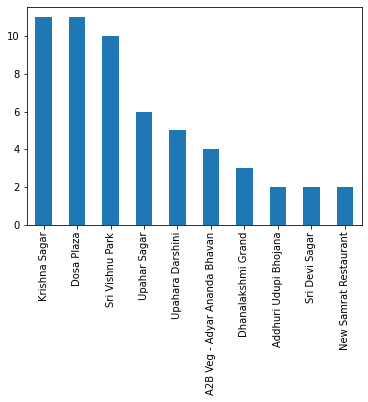

In [25]:
dosa=df[df.dish_liked=='Masala Dosa']
dosa.name.value_counts().plot(kind='bar')

Observation: 'Krishna Sagar' is most popular resto for Dosa.

In [26]:
dosa.sort_values('rateNEW', ascending=False).head(10)

,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,location,rateNEW
47011,New Samrat Restaurant,No,No,62,Casual Dining,Masala Dosa,"North Indian, South Indian, Chinese",450.0,Dine-out,Rajajinagar,4.1
40286,New Samrat Restaurant,No,No,62,Casual Dining,Masala Dosa,"North Indian, South Indian, Chinese",450.0,Dine-out,Malleshwaram,4.1
46210,Dhanalakshmi Grand,Yes,No,73,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Delivery,Rajajinagar,4.0
21508,Upahara Darshini,Yes,No,40,Casual Dining,Masala Dosa,"North Indian, Chinese, South Indian, Fast Food",600.0,Dine-out,Jayanagar,4.0
40165,Dhanalakshmi Grand,Yes,No,71,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Dine-out,Malleshwaram,4.0
39500,Dhanalakshmi Grand,Yes,No,71,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Delivery,Malleshwaram,4.0
29202,Krishna Sagar,Yes,No,52,Quick Bites,Masala Dosa,"South Indian, North Indian, Chinese",300.0,Dine-out,Koramangala 4th Block,3.9
29467,Krishna Sagar,Yes,No,52,Quick Bites,Masala Dosa,"South Indian, North Indian, Chinese",300.0,Delivery,Koramangala 5th Block,3.9
31974,Krishna Sagar,Yes,No,52,Quick Bites,Masala Dosa,"South Indian, North Indian, Chinese",300.0,Dine-out,Koramangala 5th Block,3.9
10538,Krishna Sagar,Yes,No,52,Quick Bites,Masala Dosa,"South Indian, North Indian, Chinese",300.0,Dine-out,BTM,3.9


Observation: Rating wise 'New Samrat Resto' is most popular resto for Dosa.


<AxesSubplot:>

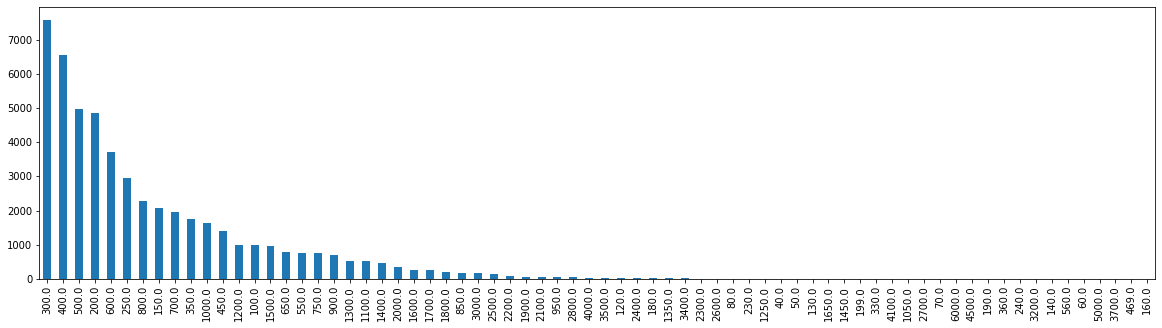

In [27]:
df.cost.value_counts().plot(kind='bar',figsize=(20,5))


Observation: Above graph shows most of resto costs Rs.300 for 2 people.

<AxesSubplot:>

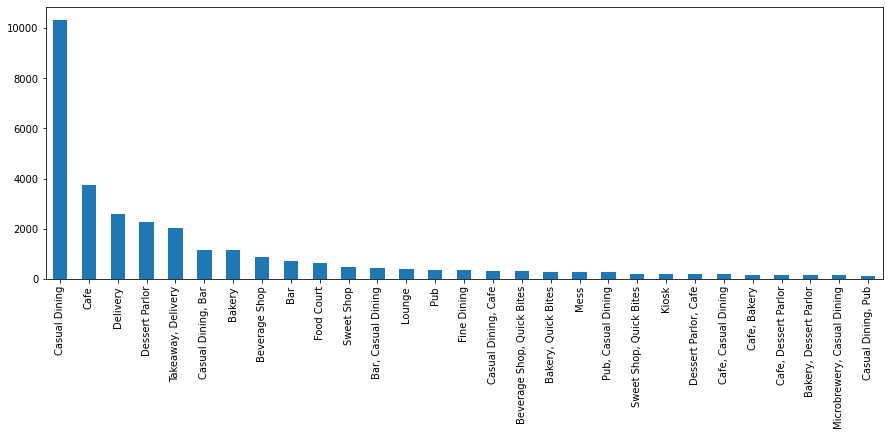

In [28]:
df.rest_type.value_counts()[1:30].plot(kind='bar',figsize=(15,5))

Observation: Above graph shows that Benglore has so many Casual Dining.


In [29]:
re=df.groupby('location')['name'].value_counts()
re

location    name                           
BTM         Bun Town                           6
            Deja Vu Resto Bar                  5
            Naati Manae                        5
            Sagar Fast Food                    5
            3B's - Buddies, Bar & Barbecues    4
                                              ..
Whitefield  Yummy Beeriyaniz                   1
            Zaica Dine & Wine                  1
            Zeeshan Restaurant                 1
            Zodiac                             1
            iCloud Irany Cafe                  1
Name: name, Length: 31681, dtype: int64

<AxesSubplot:ylabel='Density'>

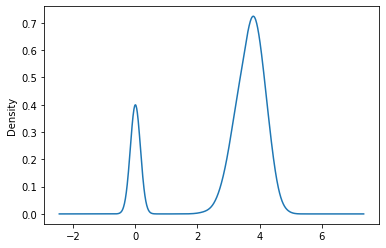

In [30]:
df.rateNEW.plot(kind='kde')

Observation: Most of the resto has average 4 rating. The pick at '0' is might be showing because of NaN value replacement.

<AxesSubplot:>

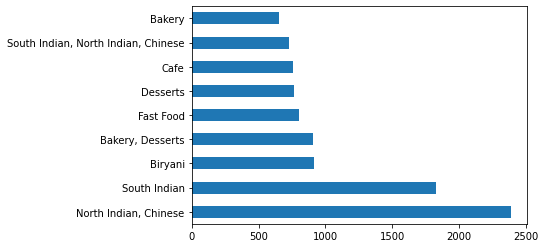

In [31]:
df.cuisines.value_counts()[1:10].plot(kind='barh')

Observation: Above chart shows that Benglore has so many resto which offers North Indian and Chinese cuisines.

In [32]:

# df['first_dishliked_item'] = df.dish_liked.astype('str').apply(lambda x : x.split()[0:3])
# df.drop('first_dishliked_item',axis=1)

In [33]:
co=df['cost']<1500
rt=df['rateNEW']>4.5
vt=df['votes']>175
BestnCheap=df[co&rt&vt]
BestnCheap.sort_values(by = ['cost', 'rateNEW','votes'], ascending = [True, False,False]).head()


,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,location,rateNEW
3338,Brahmin's Coffee Bar,No,No,2679,Quick Bites,"Filter Coffee, Kesari Bath, Idli Vada, Upma, B...",South Indian,100.0,Dine-out,Basavanagudi,4.8
632,Taaza Thindi,No,No,651,Quick Bites,"Masala Dosa, Vada, Upma, Filter Coffee, Kesari...",South Indian,100.0,Dine-out,Banashankari,4.7
46445,CTR,Yes,No,4421,Quick Bites,"Benne Masala Dosa, Filter Coffee, Chai, Butter...",South Indian,150.0,Delivery,Rajajinagar,4.8
46973,CTR,Yes,No,4421,Quick Bites,"Benne Masala Dosa, Filter Coffee, Chai, Butter...",South Indian,150.0,Dine-out,Rajajinagar,4.8
39518,CTR,Yes,No,4408,Quick Bites,"Benne Masala Dosa, Filter Coffee, Chai, Butter...",South Indian,150.0,Delivery,Malleshwaram,4.7


Observation: Above chart shows the resto. which has low cost and high ratings.

In [34]:
BestnCheap.sort_values('cost',ascending=True)

,name,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,location,rateNEW
632,Taaza Thindi,No,No,651,Quick Bites,"Masala Dosa, Vada, Upma, Filter Coffee, Kesari...",South Indian,100.0,Dine-out,Banashankari,4.7
3338,Brahmin's Coffee Bar,No,No,2679,Quick Bites,"Filter Coffee, Kesari Bath, Idli Vada, Upma, B...",South Indian,100.0,Dine-out,Basavanagudi,4.8
40161,CTR,Yes,No,4408,Quick Bites,"Benne Masala Dosa, Filter Coffee, Chai, Butter...",South Indian,150.0,Dine-out,Malleshwaram,4.7
39518,CTR,Yes,No,4408,Quick Bites,"Benne Masala Dosa, Filter Coffee, Chai, Butter...",South Indian,150.0,Delivery,Malleshwaram,4.7
46973,CTR,Yes,No,4421,Quick Bites,"Benne Masala Dosa, Filter Coffee, Chai, Butter...",South Indian,150.0,Dine-out,Rajajinagar,4.8
...,...,...,...,...,...,...,...,...,...,...,...
40485,Chili's American Grill & Bar,Yes,Yes,6440,"Casual Dining, Bar","Veg Platter, Burgers, Mushroom Soup, Cocktails...","American, Tex-Mex, Burger, BBQ, Mexican",1400.0,Pubs and bars,Malleshwaram,4.8
32103,The Black Pearl,No,Yes,10530,"Casual Dining, Bar","Chocolate Lollipop, Chocolate Biscuit, Fire Sh...","North Indian, European, Mediterranean",1400.0,Buffet,Koramangala 6th Block,4.7
40102,Chili's American Grill & Bar,Yes,Yes,6433,"Casual Dining, Bar","Veg Platter, Burgers, Mushroom Soup, Cocktails...","American, Tex-Mex, Burger, BBQ, Mexican",1400.0,Dine-out,Malleshwaram,4.8
40907,Brew and Barbeque - A Microbrewery Pub,Yes,Yes,5894,"Microbrewery, Pub","Bbq Platter, Craft Beer, Cocktails, Nachos, Pi...","Continental, North Indian, BBQ, Steak",1400.0,Delivery,Marathahalli,4.6


Observation: Above chart shows the cost wise classification of resto.